In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train=pd.read_csv('/kaggle/input/nlp-getting-started/train.csv')
test=pd.read_csv('/kaggle/input/nlp-getting-started/test.csv')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train.shape

(7613, 5)

In [3]:
test.shape

(3263, 4)

In [4]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


# Checking For Null Values

In [6]:
train.isna().sum()/len(train)*100

id           0.000000
keyword      0.801261
location    33.272035
text         0.000000
target       0.000000
dtype: float64

**Dropping the Columns with Null Values **

In [7]:
train=train.drop(['location','keyword'],axis=1)

Repeating above step with test data 

In [8]:
test.isna().sum()/len(test)*100

id           0.000000
keyword      0.796813
location    33.864542
text         0.000000
dtype: float64

In [9]:
test=test.drop(['location','keyword'],axis=1)

# Generate new columns like
 * No of charaters
 * No of words
 * No of Sentences
 * No of Hashtags
 * No of @'s
 

Function to extract number of characters

In [10]:
import nltk
from nltk import word_tokenize,sent_tokenize
nltk.download('punkt')
def num_chars(text):
  num_chars=len(text)
  return num_chars

train['num_chars']=train['text'].apply(num_chars)
test['num_chars']=test['text'].apply(num_chars)

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Function to extract word count

In [11]:
def word_count(text):
  word=word_tokenize(text)
  return len(word)

train['no_of_words']=train['text'].apply(word_count)
test['no_of_words']=test['text'].apply(word_count)

Function to extract Number od sentences

In [12]:
def sent_count(text):
  sent=sent_tokenize(text)
  return len(sent)

train['no_of_sents']=train['text'].apply(sent_count)
test['no_of_sents']=test['text'].apply(sent_count)

Function to count number of hashtags

In [13]:
import string
exclude=string.punctuation
print(exclude)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [14]:
def no_of_hashtags(text):
  y=0
  for char in text:
    if char =='#' :
      y=y+1
    else:
      y=y
  return y


Function to count number of urls

In [15]:
import re
def no_of_urls(text):
  y=re.findall(r'http',text)
  z=re.findall(r'https',text)
  return len(y+z)

In [16]:
train['text'][162]

'OMG Horrible Accident Man Died in Wings of Airplane. http://t.co/xDxDPrcPnS'

In [17]:
no_of_urls(train['text'][162])

1

In [18]:
train['no_of_hashtags']=train['text'].apply(no_of_hashtags)
test['no_of_hashtags']=test['text'].apply(no_of_hashtags)

In [19]:
train['no_of_urls']=train['text'].apply(no_of_urls)
test['no_of_urls']=test['text'].apply(no_of_urls)

In [20]:
train.head()

,id,text,target,num_chars,no_of_words,no_of_sents,no_of_hashtags,no_of_urls
0,1,Our Deeds are the Reason of this #earthquake M...,1,69,14,1,1,0
1,4,Forest fire near La Ronge Sask. Canada,1,38,8,2,0,0
2,5,All residents asked to 'shelter in place' are ...,1,133,24,2,0,0
3,6,"13,000 people receive #wildfires evacuation or...",1,65,9,1,1,0
4,7,Just got sent this photo from Ruby #Alaska as ...,1,88,18,1,2,0


# EDA

Checking distribution of Disaster and non-disaster tweets

<Axes: xlabel='target', ylabel='count'>

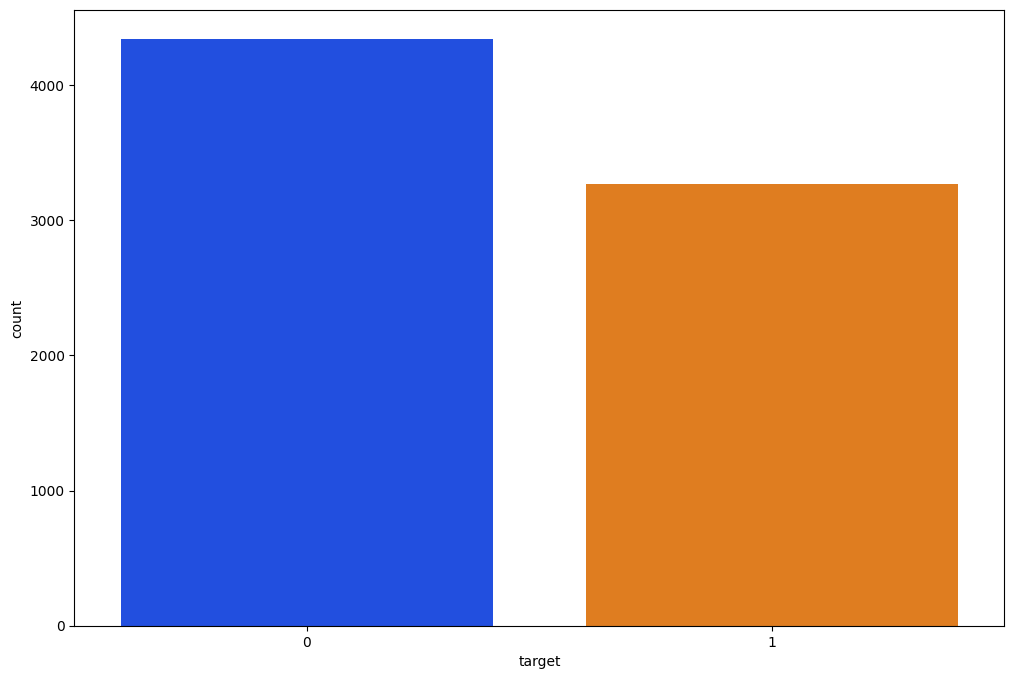

In [21]:
plt.figure(figsize=(12,8))

sns.countplot(x='target',data=train,palette='bright')

Checking the distribution of number of characters in disaster vs non disaster tweets

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_chars', ylabel='Count'>

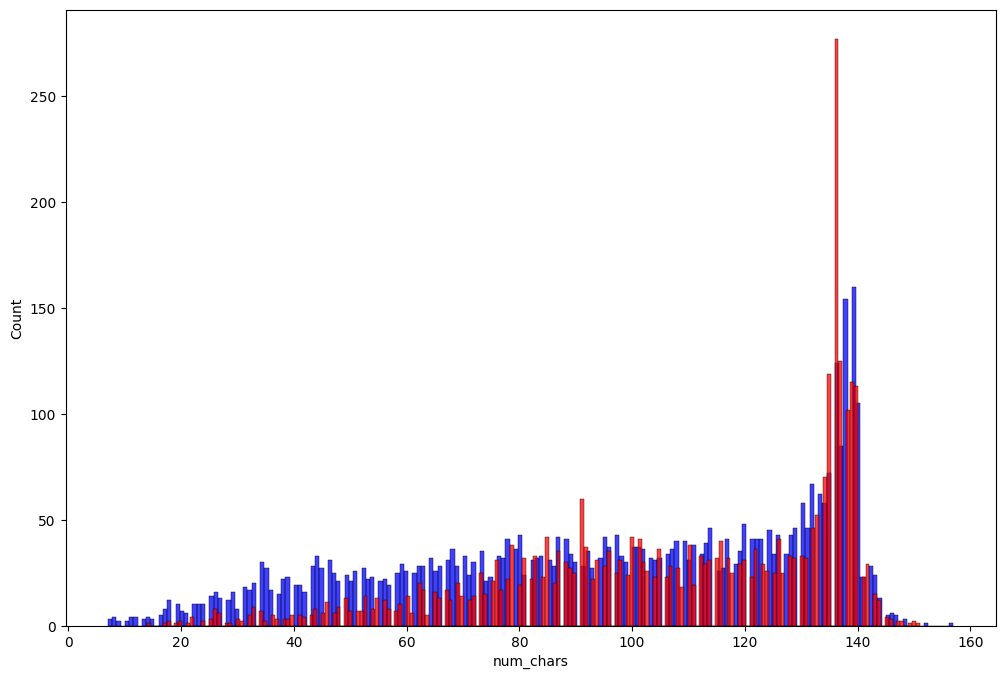

In [22]:
plt.figure(figsize=(12,8))

sns.histplot(x='num_chars',data=train[train['target']==0],bins=200,color='blue')
sns.histplot(x='num_chars',data=train[train['target']==1],bins=200,color='red')

Checking the distribution of number of words in disaster vs non disaster tweets

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='no_of_words', ylabel='Count'>

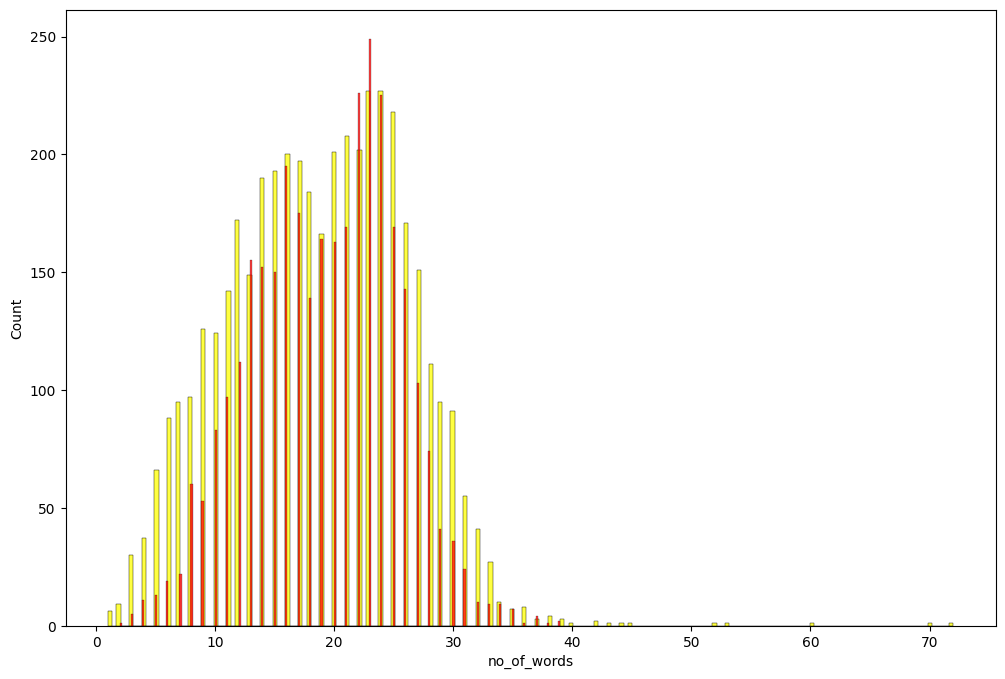

In [23]:
plt.figure(figsize=(12,8))

sns.histplot(x='no_of_words',data=train[train['target']==0],bins=200,color='yellow')
sns.histplot(x='no_of_words',data=train[train['target']==1],bins=200,color='red')

In [24]:
train.groupby('target')[['num_chars','no_of_words','no_of_sents','no_of_hashtags','no_of_urls']].sum()

,num_chars,no_of_words,no_of_sents,no_of_hashtags,no_of_urls
target,,,,,
0,415559,80859,6985,1700,2481
1,353639,62883,4569,1703,2653


In [25]:
train.groupby('target')['id'].count()

target
0    4342
1    3271
Name: id, dtype: int64

# CREATING CORRELATION MATRIX

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              7613 non-null   int64 
 1   text            7613 non-null   object
 2   target          7613 non-null   int64 
 3   num_chars       7613 non-null   int64 
 4   no_of_words     7613 non-null   int64 
 5   no_of_sents     7613 non-null   int64 
 6   no_of_hashtags  7613 non-null   int64 
 7   no_of_urls      7613 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 475.9+ KB


In [27]:
matrix=train.iloc[:,[2,3,4,5,6,7]].corr()
matrix

,target,num_chars,no_of_words,no_of_sents,no_of_hashtags,no_of_urls
target,1.000000,0.181817,0.043412,-0.121508,0.058115,0.160159
num_chars,0.181817,1.000000,0.872826,0.153142,0.210393,0.269897
no_of_words,0.043412,0.872826,1.000000,0.375645,0.229293,0.032329
no_of_sents,-0.121508,0.153142,0.375645,1.000000,0.022882,-0.136538
no_of_hashtags,0.058115,0.210393,0.229293,0.022882,1.000000,0.182531
no_of_urls,0.160159,0.269897,0.032329,-0.136538,0.182531,1.000000


<Axes: >

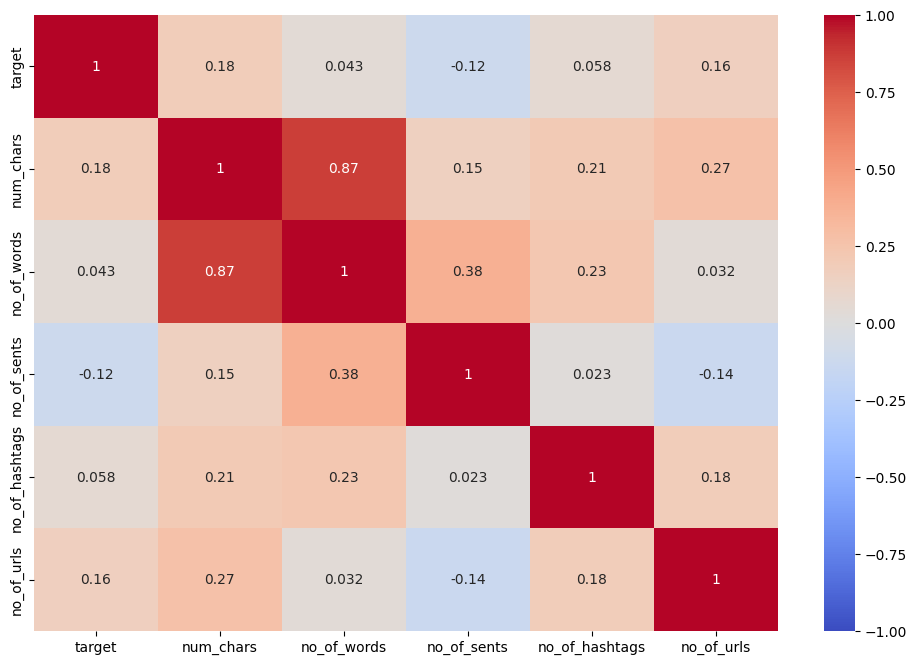

In [28]:
plt.figure(figsize=(12,8))
sns.heatmap(matrix,vmin=-1,vmax=1,annot=True,cmap='coolwarm')

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              7613 non-null   int64 
 1   text            7613 non-null   object
 2   target          7613 non-null   int64 
 3   num_chars       7613 non-null   int64 
 4   no_of_words     7613 non-null   int64 
 5   no_of_sents     7613 non-null   int64 
 6   no_of_hashtags  7613 non-null   int64 
 7   no_of_urls      7613 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 475.9+ KB


In [30]:
train=train.drop('id',axis=1)

Text preprocessing

In [31]:
example=train['text'][3643]
print(example)

There have been zero spider bite-related fatalities in Australia since 1979.


In [32]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words=stopwords.words('english')
print(stop_words)

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any'

In [33]:
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()

In [34]:
def text_transform(text):
  text=text.lower()                       #lower case
  text=re.sub(r'(?:https?://)?(?:www\.)?[a-zA-Z0-9-]+\.[a-zA-Z]{2,}(?:/[^\s]*)?','',text)   #remove word starting with https:\\ or http:\\
  words=word_tokenize(text)               #word tokenisation
  y=[]
  for word in words:                      #stopwords removal
    if word not in stop_words:
      y.append(word)
  text=' '.join(y)
  for char in exclude:                    # remove punctuations
    text=text.replace(char,' ')
  x=[]
  for word in word_tokenize(text):       ##stemming
    x.append(stemmer.stem(word))
  text=' '.join(x)
  text=re.sub(r'\W+',' ',text)
  text = re.sub(r'[^\x00-\x7F]+', ' ', text)


  return text

In [35]:
text_transform(example)

'zero spider bite relat fatal australia sinc 1979'

In [36]:
train['new_text']=train['text'].apply(text_transform)

In [37]:
test['new_text']=test['text'].apply(text_transform)

In [38]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              3263 non-null   int64 
 1   text            3263 non-null   object
 2   num_chars       3263 non-null   int64 
 3   no_of_words     3263 non-null   int64 
 4   no_of_sents     3263 non-null   int64 
 5   no_of_hashtags  3263 non-null   int64 
 6   no_of_urls      3263 non-null   int64 
 7   new_text        3263 non-null   object
dtypes: int64(6), object(2)
memory usage: 204.1+ KB


Generating Word cloud

In [39]:
disaster_text=' '.join(train[train['target']==1]['new_text'])

In [40]:
disaster_text

'deed reason earthquak may allah forgiv us forest fire near la rong sask canada resid ask shelter place notifi offic evacu shelter place order expect 13 000 peopl receiv wildfir evacu order california got sent photo rubi alaska smoke wildfir pour school rockyfir updat california hwi 20 close direct due lake counti fire cafir wildfir flood disast heavi rain caus flash flood street manit colorado spring area m top hill see fire wood s emerg evacu happen build across street m afraid tornado come area three peopl die heat wave far haha south tampa get flood hah wait second live south tampa gon na gon na fvck flood rain flood florida tampabay tampa 18 19 day ve lost count flood bago myanmar arriv bago damag school bu 80 multi car crash break bbcmtd wholesal market ablaz africanbaz break news nigeria flag set ablaz aba inec offic abia set ablaz barbado bridgetown jamaica   two car set ablaz santa cruz   head st elizabeth polic superintend west burn thousand wildfir ablaz california alon depu

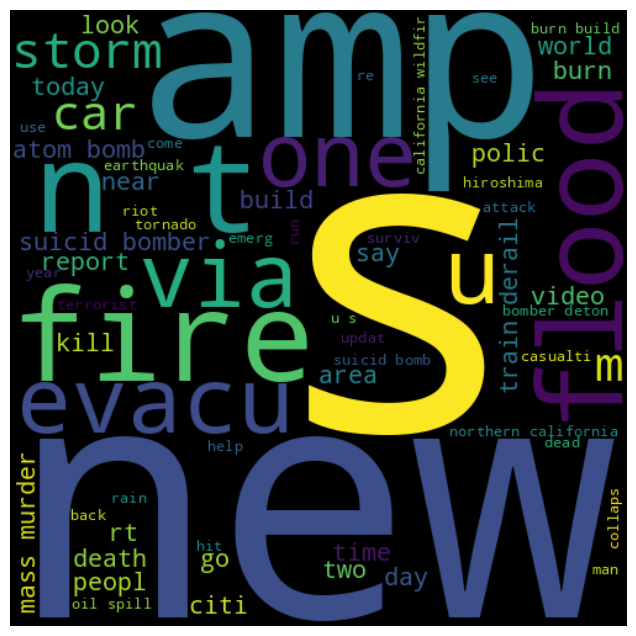

In [41]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, max_words=200).generate(disaster_text)

plt.figure(figsize=(20,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()


In [42]:
non_disaster_text=' '.join(train[train['target']==0]['new_text'])

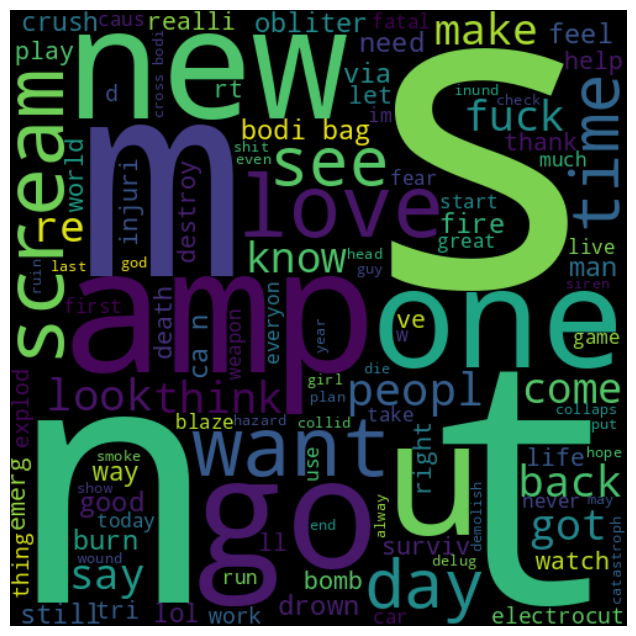

In [43]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, max_words=200).generate(non_disaster_text)

plt.figure(figsize=(20,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

Text Vectrization


1.   Countvectorize
2.   N-grams
3.   Tf-Idf



In [44]:
from sklearn.feature_extraction.text import CountVectorizer
vector=CountVectorizer(ngram_range=(2, 2))
train_matrix=vector.fit_transform(train['new_text']).toarray()
names=vector.get_feature_names_out()

In [45]:
test_matrix=vector.transform(test['new_text']).toarray()
names_test=vector.get_feature_names_out()

In [46]:
train.shape

(7613, 8)

In [47]:
test.shape

(3263, 8)

In [48]:
train_matrix=pd.DataFrame(train_matrix,columns=names)

In [49]:
train_matrix.head()

,00 11,00 18,00 25,00 52,00 at,00 bestsel,00 cest,00 cs,00 earthquak,00 ep,...,zonewolf123 like,zoom one,zotar 50,zouma absolut,zouma flatten,zourryart forgot,zss vs,zumiez locat,zurich swiss,zxatheti are
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
test_matrix=pd.DataFrame(test_matrix,columns=names_test)

In [51]:
test_matrix.head()

,00 11,00 18,00 25,00 52,00 at,00 bestsel,00 cest,00 cs,00 earthquak,00 ep,...,zonewolf123 like,zoom one,zotar 50,zouma absolut,zouma flatten,zourryart forgot,zss vs,zumiez locat,zurich swiss,zxatheti are
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   text            7613 non-null   object
 1   target          7613 non-null   int64 
 2   num_chars       7613 non-null   int64 
 3   no_of_words     7613 non-null   int64 
 4   no_of_sents     7613 non-null   int64 
 5   no_of_hashtags  7613 non-null   int64 
 6   no_of_urls      7613 non-null   int64 
 7   new_text        7613 non-null   object
dtypes: int64(6), object(2)
memory usage: 475.9+ KB


In [53]:
train_final_data=pd.concat([train.iloc[:,[1,2,4,5,6]],train_matrix],axis=1)

In [54]:
train_final_data.shape

(7613, 47527)

In [55]:
train_final_data.head()

,target,num_chars,no_of_sents,no_of_hashtags,no_of_urls,00 11,00 18,00 25,00 52,00 at,...,zonewolf123 like,zoom one,zotar 50,zouma absolut,zouma flatten,zourryart forgot,zss vs,zumiez locat,zurich swiss,zxatheti are
0,1,69,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,38,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,133,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,65,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,88,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              3263 non-null   int64 
 1   text            3263 non-null   object
 2   num_chars       3263 non-null   int64 
 3   no_of_words     3263 non-null   int64 
 4   no_of_sents     3263 non-null   int64 
 5   no_of_hashtags  3263 non-null   int64 
 6   no_of_urls      3263 non-null   int64 
 7   new_text        3263 non-null   object
dtypes: int64(6), object(2)
memory usage: 204.1+ KB


In [57]:
test_final_data=pd.concat([test.iloc[:,[2,4,5,6]],test_matrix],axis=1)

In [58]:
test_final_data.shape

(3263, 47526)

In [59]:
test_final_data.head()

,num_chars,no_of_sents,no_of_hashtags,no_of_urls,00 11,00 18,00 25,00 52,00 at,00 bestsel,...,zonewolf123 like,zoom one,zotar 50,zouma absolut,zouma flatten,zourryart forgot,zss vs,zumiez locat,zurich swiss,zxatheti are
0,34,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,64,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,96,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,40,2,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,45,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Classification using randon forest classifier and k-fold cross validation

In [60]:
X=train_final_data.iloc[:,1:]
Y=train_final_data.iloc[:,0]

In [61]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [62]:
X.shape

(7613, 47526)

In [63]:
Y.shape

(7613,)

In [64]:
test_final_data.shape

(3263, 47526)

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold,cross_val_score,cross_val_predict
rf=RandomForestClassifier(n_estimators=50)
k=KFold(n_splits=3,shuffle=True,random_state=43)
accuracy=cross_val_score(rf,X,Y,cv=k,n_jobs=-1).mean()
print(accuracy)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


0.7045853234488385


In [66]:
model=rf.fit(X,Y)

In [67]:
Y_pred=model.predict(test_final_data)

In [68]:
Y_pred=pd.DataFrame(Y_pred,columns=['target'])

In [69]:
test=pd.concat([test,Y_pred],axis=1)

In [70]:
output=test[['id','target']]

In [71]:
output.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [72]:
output.set_index('id',inplace=True)

In [73]:
output.head()

,target
id,
0,0
2,0
3,0
9,0
11,0


In [74]:
import os

# Specify the path of the directory you want to clear
directory_path = '/kaggle/working/'

# List all files in the directory
files = os.listdir(directory_path)
print(files)

#os.remove('/kaggle/working/submission.csv')


['__notebook__.ipynb']


In [75]:
output.to_csv('/kaggle/working/submission.csv')